> ## Import dependencies

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

['database.sqlite', 'Iris.csv']


## NumPy examples

In [34]:
# examples from NumPy
row_vector = np.array([1, 2, 3])
row_vector

array([1, 2, 3])

Reshaping one-dimensional array into a two-dimensional one. All three approaches create views, not copies, of the `row_vector` array:

In [36]:
column_vector = np.array([1, 2, 3]).reshape(-1, 1)
column_vector

array([[1],
       [2],
       [3]])

In [37]:
row_vector[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [38]:
row_vector[:, None]

array([[1],
       [2],
       [3]])

### Matrix multiplication

Number of columns of the left matrix must match the number of rows of the matrix to the right.

$ \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix} \times \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 14 \\ 32 \end{bmatrix} $

In [40]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])
column_vector = np.array([1, 2, 3]).reshape(-1, 1)
np.matmul(matrix, column_vector)

array([[14],
       [32]])

In [41]:
np.dot(matrix, column_vector)

array([[14],
       [32]])

However, if we are working with matrices and vectors, NumPy can
be quite forgiving if the dimensions of matrices and one-dimensional ar- rays do not match exactly – thanks to broadcasting. The following example yields the same result as the matrix-column vector multiplication, except that it returns a one-dimensional array instead of a two-dimensional one:

In [43]:
np.matmul(matrix, row_vector)

array([14, 32])

In [48]:
np.dot(matrix, row_vector)

array([14, 32])

### Dot-product of vectors (vector norm):

In [44]:
np.matmul(row_vector, row_vector)

14

In [45]:
np.dot(row_vector, row_vector)

14

### Multiplying matrices

In [49]:
matrix.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

In [51]:
matrix.T

array([[1, 4],
       [2, 5],
       [3, 6]])

$ \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix} \times \begin{bmatrix} 1 & 4 \\ 2 & 5 \\ 3 & 6 \end{bmatrix} = \begin{bmatrix} 14 & 32 \\ 32 & 77 \end{bmatrix} $

In [52]:
np.dot(matrix, matrix.T)

array([[14, 32],
       [32, 77]])

### Set operations in NumPy

A set is essentially a collection of unique elements. Given an array, we can generate such a "set" using the `np.unique` function.

In [53]:
ary = np.array([1, 1, 2, 3, 1, 5])
ary_set = np.unique(ary)
ary_set

array([1, 2, 3, 5])

In [54]:
ary1 = np.array([1, 2, 3])
ary2 = np.array([3, 4, 5, 6])
np.intersect1d(ary1, ary2, assume_unique=True)

array([3])

In [55]:
np.setdiff1d(ary1, ary2, assume_unique=True)

array([1, 2])

In [56]:
np.union1d(ary1, ary2)

array([1, 2, 3, 4, 5, 6])

## Read data from Iris dataset

In [3]:
df = pd.read_csv('../input/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

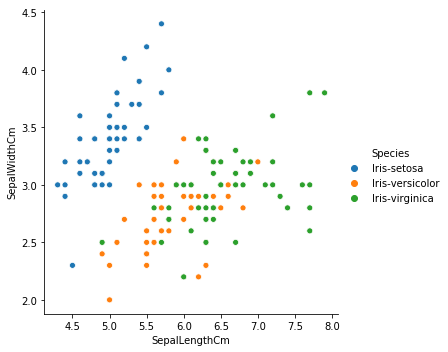

In [6]:
sns.relplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')

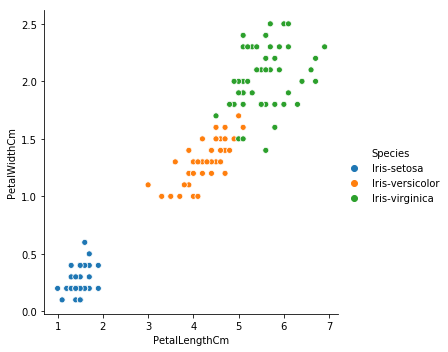

In [7]:
sns.relplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')

## Feature selection

$\newcommand{\R}{\mathbb{R}}$
The Iris dataset consists of 150 samples and 4 features and thus can be rewritten as a $150 \times 4$ matrix $\boldsymbol{X} \in \R ^{150 \times 4}$. Subscript $x_i$ refers to the dimension, superscript $x^{(j)}$ refers to training sample, so $x_1^{(150)}$ refers to the $1^{st}$ dimension of flower sample $150$. 

Each row in the feature matrix represents one flower instance rewritten as a 4-dimensional row vector $\boldsymbol{x}^{(i)} \in \R^{1x4}$. 

$ x^{(i)} = \begin{bmatrix} x_1^{(i)} & x_2^{(i)} & x_3^{(i)} & x_4^{(i)} \end{bmatrix}$ 

Each feature dimension is a 150-dimensional column vector $\boldsymbol{x_j} \in \R ^{150 \times 1}$

$ \begin{bmatrix} x_j^{(1)} \\ x_j^{(2)} \\ \vdots \\ x_j^{(150)} \end{bmatrix} $

The whole dataset can then be summarized in the matrix of the following form:

$ \begin{bmatrix} 
x_1^{(1)} & x_2^{(1)} & x_3^{(1)} & x_4^{(1)} \\
x_1^{(2)} & x_2^{(2)} & x_3^{(2)} & x_4^{(2)} \\
\vdots & \vdots & \vdots & \vdots \\
x_1^{(150)} & x_2^{(150)} & x_3^{(150)} & x_4^{(150)}
\end{bmatrix} $

## Perceptron classifier algorithm

Based on [Python Machine Learning (2nd edition) by Sebastian Raschka and Vahid Mirjalili](https://github.com/stepan-o/python-machine-learning-book-2nd-edition):

An important pioneering neural network was developed based on the first concept for the perceptron learning rule that was introduced by [Frank Rosenblatt in 1957](https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf), based in turn on the MCP artificial neuron model introduced by [McCulloch and Pitts in 1943](http://www.mind.ilstu.edu/curriculum/modOverview.php?modGUI=212). The core idea behind the MCP neuron and Rosenblatt's thresholded perceptron model is to use a reductionist approach to mimic how a single neuron in the brain works: it either fires or it doesn't.

With his perceptron rule, Rosenblatt proposed an algorithm that would automatically learn the optimal weight coefficients that are then multiplied with the input features in order to make the decision of whether a nueron fires or not. In the context of supervised learning and classification, such an algorithm can be used to predict if a sample belongs to one class or the other.

If we refer to two classes as 1 (positive class) and -1 (negative class), we can define a decision function $\phi(z)$ that takes a linear combination of certain input values $\boldsymbol{x}$ and a corresponding weight factor $\boldsymbol{w}$, where $z$ is the so-called **net input**:

$ z = w_1 x_1 + \dots + w_m x_m $

If the net input of a particular sample $x^{(i)}$ is greater than a defined threshold $\theta$, we predict class 1, and class -1 otherwise. Decision function $\phi(\cdot)$ in the perceptron algorithm is a variant of a unit step function:

$ 
\phi(z) = 
\left\{
\begin{array}{ll}
      1 & if~z \geq \theta \\
      -1 & otherwise
\end{array} 
\right. $ 

For simplicity, we can bring the threshold $\theta$ to the left side of the equation and define a weight-zero as $w_0=-\theta$ and $x_0=1$, so that we can write net input $z$ in a more compact form by using a vector dot product of input vector $\boldsymbol{x}$ and the transposed vector of weights $\boldsymbol{w}^T$ (column vector turned into a row vector):

$ z = w_0 x_0 + w_1 x_1 + \dots + w_m x_m = \sum \limits_{j=0}^m x_j w_j = \boldsymbol{w}^T \boldsymbol{x} $

And for the decision function:

$ \phi (z) = \left\{ \begin{array}{ll} 1 & if ~ z \geq 0 \\ -1 & otherwise \end{array} \right.$

In machine learning literature, the negative threshold, or weight, $w_0=-\theta$ is usually called the **bias unit**.

Weights are initialized to 0 or small random numbers, and for each training sample $x^{(i)}$, after the output value $\hat{y}$ is computed, each weight $w_j$ can be updated proportional to input value $x_j$ (all the weights in the weight vector are being updated simultaneously) as:

$\Delta w_j = \eta (y^{(i)} - \hat{y} ^{(i)} ) x_j^{(i)}$

where $\eta$ is the **learning rate** (typically a constant between 0.0 and 1.0), $y^{(i)}$ is the true class label of the $i^{th}$ training sample, and $\hat{y}^{(i)}$ is the predicted class label.

In the case of a correct prediction, $y^{(i)} - \hat{y}^{(i)}=0$ and the weights remain the same. However, in the case of a wrong prediction, the weights are being pushed towards the direction of the positive or negative target class with correction values of $\Delta w_j = \eta(2)x_j^{(i)}$ or $\eta(-2)x_j^{(i)}$.

It is important to note that **convergence of the perceptron is only guaranteed if the two classes are linearly separable** and the **learning rate is sufficiently small**. If the two classes cannot be separated by a linear decision boundary, the perceptron would never stop updating the weights, so either the maximum number of passes over the training dataset _(epochs)_ and/or a threshold for the number of tolerated misclassifications must be set.

### Implementing Perceptron learning algorithm in Python

As a convention, we append an underscore `_` to attributes that are not being created upon the initialization of the object but by calling the object's other methods, for example, `self.w_`.

Defining a perceptron algorithm as a Python class (from [Python Machine Learning (2nd edition) by Sebastian Raschka and Vahid Mirjalili](https://github.com/stepan-o/python-machine-learning-book-2nd-edition)):

In [ ]:
class Perceptron(object):
    """
    Perceptron classifier
    
    Parameters
    ----------
    eta : float
      Learning rate (between 0.0 and 1.0).
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight initialization.
      
    Attributes
    ----------
    w_ : 1-d array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples
          and n_features is the number of features.
        y : {array-like}, shape = [n_samples]
          Target values.
        
        Returns
        -------
        self : object
        
        """
        rgen = np.random.Random